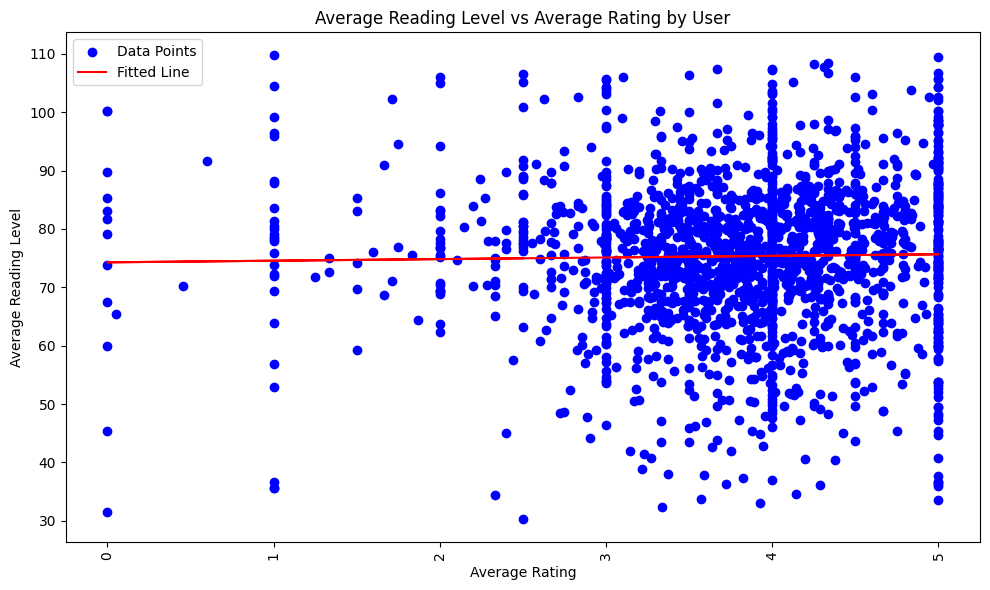

Slope: 0.28
Intercept: 74.28
R-squared: 0.00
RMSE: 12.86


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat  # Example for applying text readability metric
from scipy.stats import linregress

# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 100000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)

for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Example function to apply to each review (you can change this based on your needs)
def review_function(review_text):
    # Here we use Flesch Reading Ease as an example
    return textstat.flesch_reading_ease(review_text)

# Group by 'user_id'
grouped = df.groupby('user_id')

# Prepare to store average values per user
user_ids = []
average_scores = []
average_ratings = []

# Loop through each user and calculate the average of the function results
for user_id, group in grouped:
    # Apply the function to each review for this user
    scores = group['review_text'].apply(review_function)
    
    # Calculate the average score for the user
    avg_score = np.mean(scores)
    avg_rating = group['rating'].mean()
    
    # Store the user ID and their average score
    user_ids.append(user_id)
    average_scores.append(avg_score)
    average_ratings.append(avg_rating)

# Convert results to a DataFrame for easy plotting
results = pd.DataFrame({
    'user_id': user_ids,
    'average_score': average_scores,
    'average_rating': average_ratings
})

#Filtering the average score to include only values between 30 and 110
results = results[(results['average_score'] >= 30) & (results['average_score'] <= 110)]

# Plotting the average score for each user
plt.figure(figsize=(10, 6))
plt.scatter(results['average_rating'], results['average_score'], color='blue', label='Data Points')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(results['average_rating'], results['average_score'])

# Plot the regression line
plt.plot(results['average_rating'], intercept + slope * results['average_rating'], color='red', label='Fitted Line')


# Calculate the RMSE
rmse = np.sqrt(np.mean((results['average_score'] - (intercept + slope * results['average_rating']))**2))
# Add labels and title
plt.ylabel('Average Reading Level')
plt.xlabel('Average Rating')
plt.title('Average Reading Level vs Average Rating by User')
plt.legend()

# Rotate x labels if there are too many users
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

# Print the linear regression results
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f'RMSE: {rmse:.2f}')


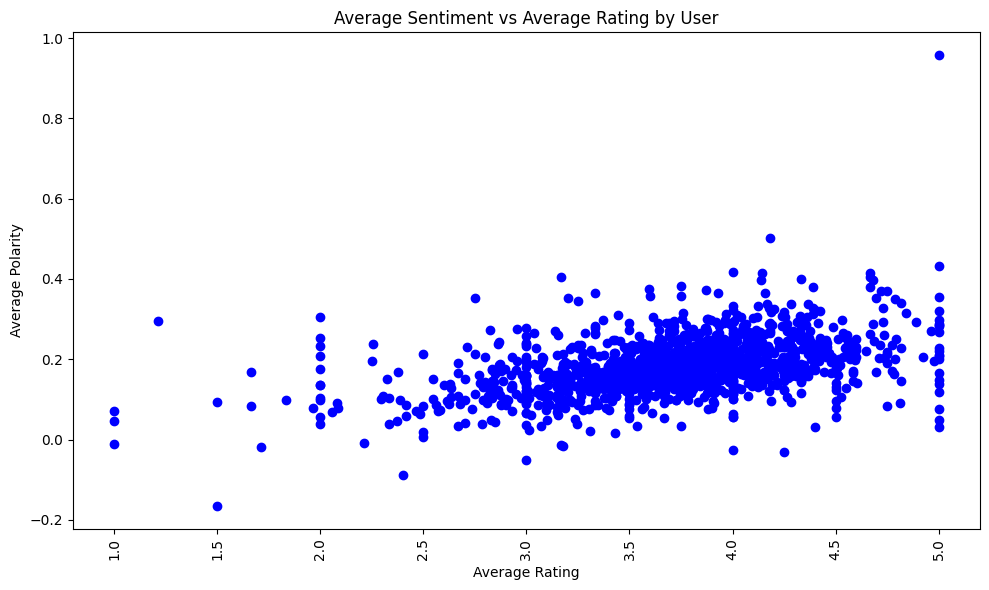

In [ ]:
# **** Rating Vs. Sentimentality - Polarity (Positive or Negative) ****

from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat  # Example for applying text readability metric

# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 100000
chunks = pd.read_json('./data/goodreads_reviews_spoiler_raw.json', lines=True, chunksize=chunk_size)



for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Example function to apply to each review (you can change this based on your needs)
def review_function(review_text):
    # Here we use Flesch Reading Ease as an example
    return textstat.flesch_reading_ease(review_text)

def textblob_function(review_text):
    blob = TextBlob(review_text)
    return blob.sentiment.polarity

# Group by 'user_id'
grouped = df.groupby('user_id')

# Prepare to store average values per user
user_ids = []
average_polarity = []
average_ratings = []

# Loop through each user and calculate the average of the function results
for user_id, group in grouped:
    # Apply the function to each review for this user
    polarity = group['review_text'].apply(textblob_function)
    
    # Calculate the average score for the user
    avg_polarity = np.mean(polarity)
    avg_rating = group['rating'].mean()
    
    # Store the user ID and their average score
    user_ids.append(user_id)
    average_polarity.append(avg_polarity)
    average_ratings.append(avg_rating)

# Convert results to a DataFrame for easy plotting
results = pd.DataFrame({
    'user_id': user_ids,
    'average_polarity': average_polarity,
    'average_rating': average_ratings
})

# Plotting the average score for each user
plt.figure(figsize=(10, 6))
plt.scatter(results['average_rating'], results['average_polarity'], color='blue')

# Add labels and title
plt.ylabel('Average Polarity')
plt.xlabel('Average Rating')
plt.title('Average Sentiment vs Average Rating by User')

# Rotate x labels if there are too many users
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


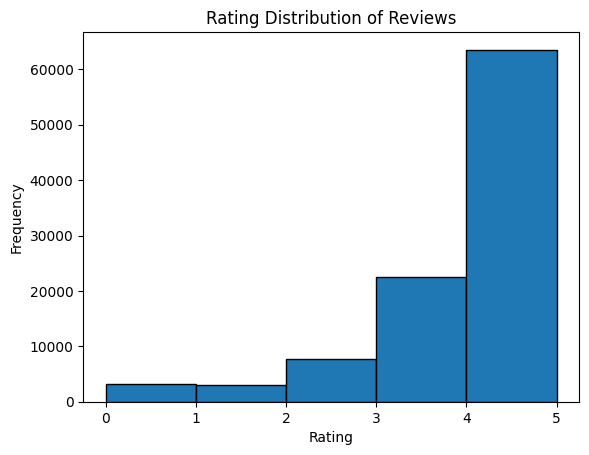

Average Rating: 3.69
Median Rating: 4.00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file

chunk_size = 100000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)
for chunk in chunks:
    df = chunk
    break  # Stop after

# Drop rows with missing ratings
df = df.dropna(subset=['rating'])

average_rating = df['rating'].mean()
median_rating = df['rating'].median()

# Extract the 'rating' column
ratings = df['rating']
# Plot the histogram
plt.hist(ratings, bins=5, edgecolor='black')
plt.title("Rating Distribution of Reviews")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
print(f"Average Rating: {average_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")



      book_id  average_score
0           2          81.63
1           6          82.65
2          21          70.53
3         122          77.23
4         151         101.60
..        ...            ...
993  35604204          73.37
994  35651398          91.48
995  35688309          76.72
996  36065344          85.79
997  36252773          83.36

[998 rows x 2 columns]


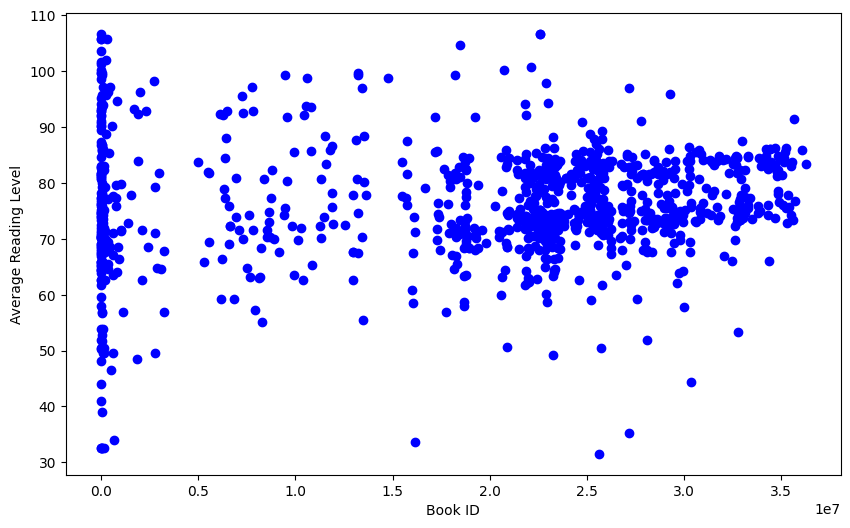

In [12]:

import textstat 
chunk_size = 1000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)


for chunk in chunks:
    df = chunk
    break 

def review_function(review_text):
    return textstat.flesch_reading_ease(review_text)



grouped = df.groupby('book_id')

book_ids = []
average_scores = []


for book_id, group in grouped:
    scores = group['review_text'].apply(review_function)
    avg_score = np.mean(scores)
    book_ids.append(book_id)
    average_scores.append(avg_score)

results = pd.DataFrame({
    'book_id': book_ids,
    'average_score': average_scores
})

filtered_results = results[(results['average_score'] >= 30) & (results['average_score'] <= 110)]
plt.figure(figsize=(10, 6))

max_score = filtered_results['average_score'].max()



scatter = plt.scatter(filtered_results['book_id'], filtered_results['average_score'], color='blue')
plt.xlabel('Book ID')
plt.ylabel('Average Reading Level')

print(results)


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Example texts
texts = {
    "text1": "I love this Book! It's absolutely amazing.",
    "text2": "I hate this Book! It's absolutely terrible.",
    "text3": "This book was published in 2003"
}

# Analyze the sentiment for each text
for key, text in texts.items():
    sentiment_scores = sid.polarity_scores(text)
    
    # Extract polarity and objectivity
    polarity = sentiment_scores['compound']
    objectivity = sentiment_scores['neu']
    # Print the sentiment scores
    print(f"{key}:")
    print(f"  Polarity: {polarity}")
    print(f"  Objectivity: {objectivity}")

text1:
  Polarity: 0.862
  Objectivity: 0.318
text2:
  Polarity: -0.8118
  Objectivity: 0.351
text3:
  Polarity: 0.0
  Objectivity: 1.0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samipdevkota/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samipdevkota/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change

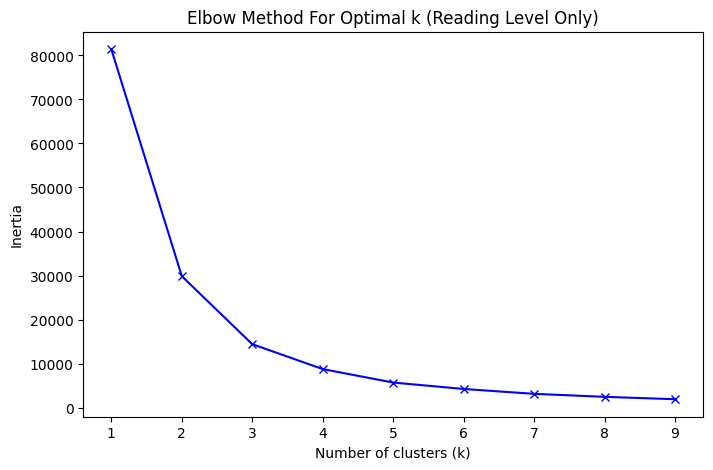

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yr/pqltkj1j2hgbvhbnxf97zf580000gn/T/ipykernel_93301/2155256213.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['cluster_id_readinglevel'] = kmeans_readinglevel.fit_predict(X_readinglevel)


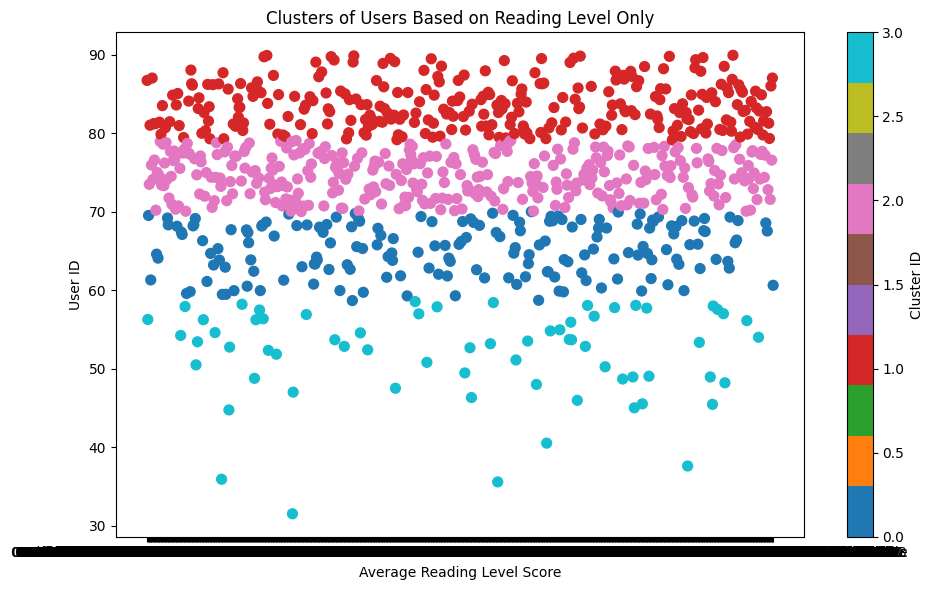

Within-Cluster Comparison
Average Percentage of Common Books: 33.40%
Median Percentage of Common Books: 30.77%
With-Dataset Comparison
Average Percentage of Common Books: 45.79%
Median Percentage of Common Books: 43.59%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

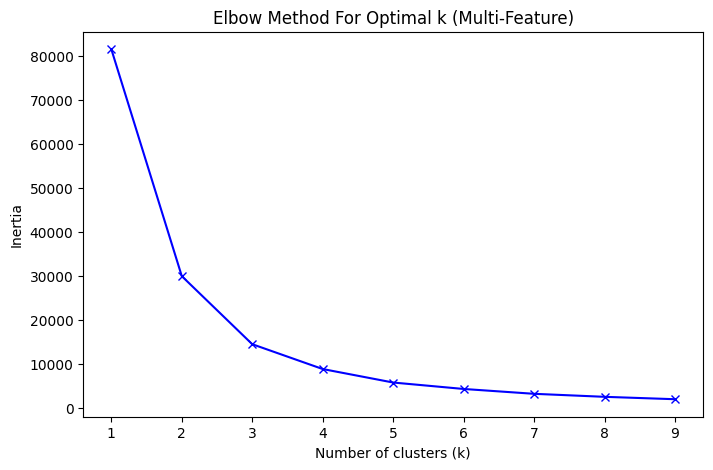

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yr/pqltkj1j2hgbvhbnxf97zf580000gn/T/ipykernel_93301/2155256213.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['cluster_id_multifeature'] = kmeans_multifeature.fit_predict(X_multifeature)


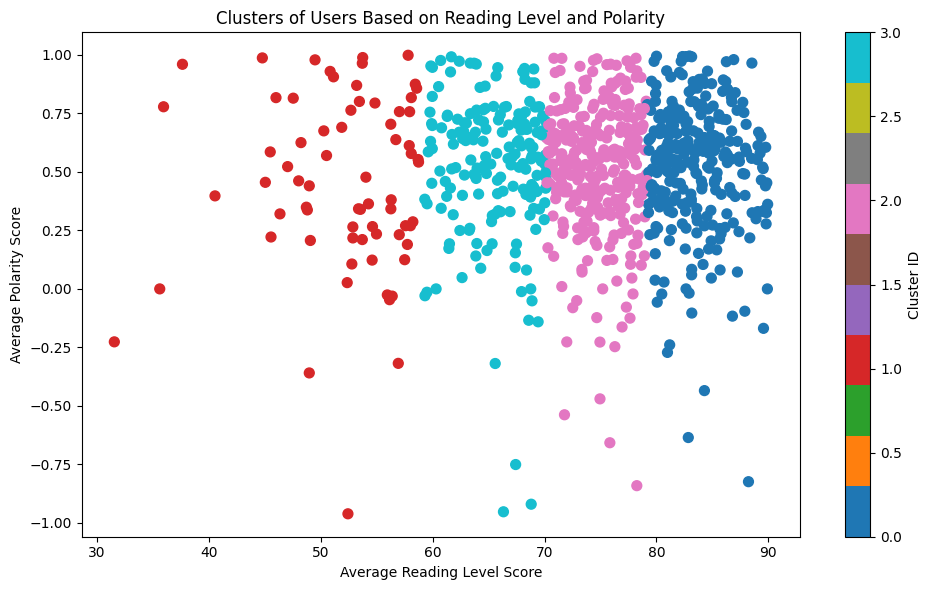

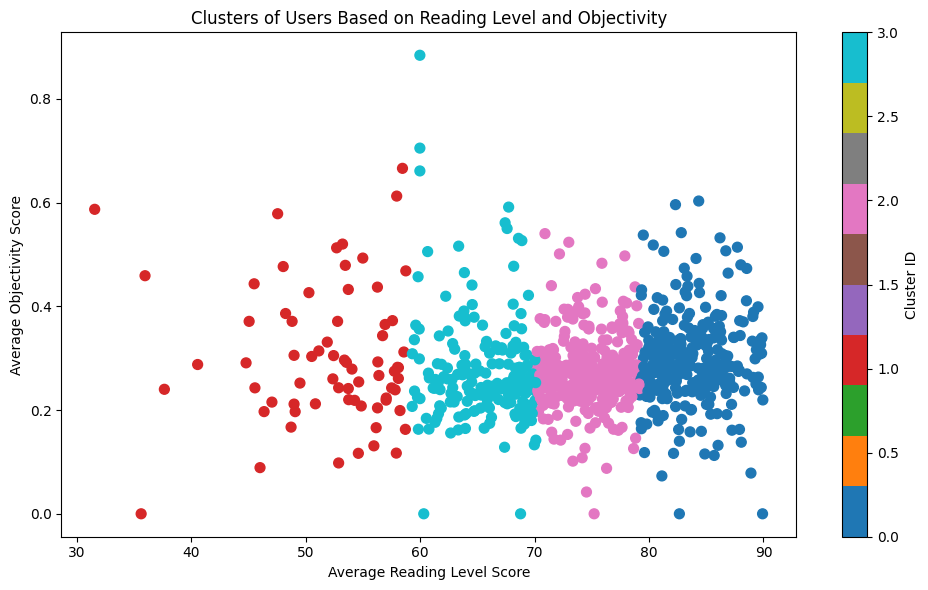

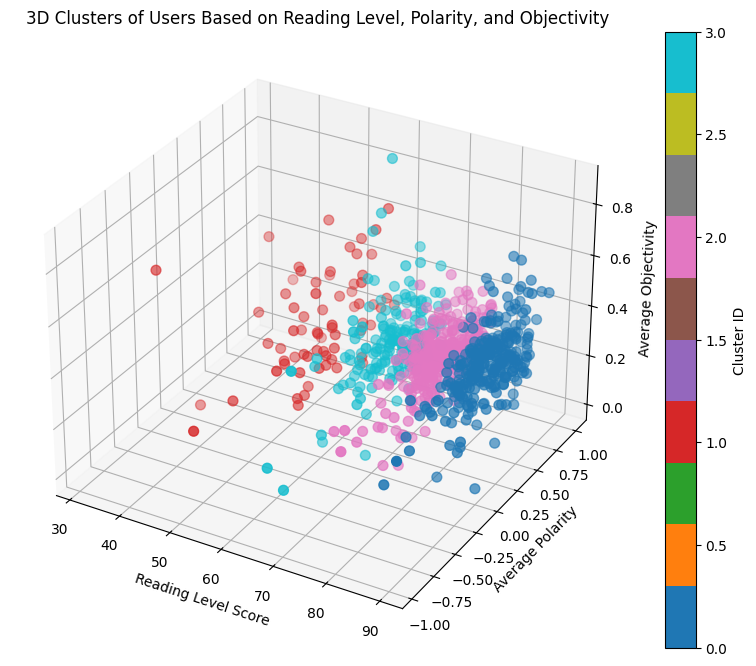

Multi-Feature Based Clustering - Within Cluster
Average Percentage of Common Books: 28.30%
Median Percentage of Common Books: 22.48%
Random Sample of user - With Dataset
Average Percentage of Common Books: 47.69%
Median Percentage of Common Books: 44.10%


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat  # Example for applying text readability metric
from sklearn.cluster import KMeans
import random
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results from langdetect
DetectorFactory.seed = 0

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 50000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)

for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Function to detect language
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

# Filter out non-English reviews
df = df[df['review_text'].apply(is_english)]

# Example function to apply to each review (you can change this based on your needs)
def review_function(review_text):
    return textstat.flesch_reading_ease(review_text)

def polarity_function(review_text):
    return sid.polarity_scores(review_text)['compound']

def objectivity_function(review_text):
    return 1 - sid.polarity_scores(review_text)['neu']

# Group by 'user_id' and calculate average metrics for each user
user_ids = []
average_scores = []
average_polarities = []
average_objectivities = []

for user_id, group in df.groupby('user_id'):
    scores = group['review_text'].apply(review_function)
    polarities = group['review_text'].apply(polarity_function)
    objectivities = group['review_text'].apply(objectivity_function)
    
    user_ids.append(user_id)
    average_scores.append(np.mean(scores))
    average_polarities.append(np.mean(polarities))
    average_objectivities.append(np.mean(objectivities))

# Convert results to a DataFrame
results = pd.DataFrame({
    'user_id': user_ids,
    'average_score': average_scores,
    'average_polarity': average_polarities,
    'average_objectivity': average_objectivities
})

# Step 1: Filter based on Flesch Reading Ease Score
filtered_results = results[(results['average_score'] >= 30) & (results['average_score'] <= 90)]
X_readinglevel = filtered_results[['average_score']].values

# Step 2: Determine optimal clusters for reading level only using Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_readinglevel)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Reading Level Only)')
plt.show()

# Step 3: Apply K-means clustering with optimal_k (reading level only)
optimal_k_readinglevel = 4  # Adjust this based on the elbow method plot
kmeans_readinglevel = KMeans(n_clusters=optimal_k_readinglevel, random_state=0)
filtered_results['cluster_id_readinglevel'] = kmeans_readinglevel.fit_predict(X_readinglevel)

# Plot reading level-based clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_results['user_id'], filtered_results['average_score'], c=filtered_results['cluster_id_readinglevel'], cmap='tab10', s=50)
plt.colorbar(label='Cluster ID')
plt.xlabel('Average Reading Level Score')
plt.ylabel('User ID')
plt.title('Clusters of Users Based on Reading Level Only')
plt.tight_layout()
plt.show()

# Step 4: Sample from the reading level-based clusters and analyze
num_iterations = 100
common_books_percentages_within_cluster = []
common_books_percentages_with_dataset = []

# Select one cluster to sample from multiple times
selected_cluster_id = random.choice(filtered_results['cluster_id_readinglevel'].unique())
users_in_selected_cluster = filtered_results[filtered_results['cluster_id_readinglevel'] == selected_cluster_id]['user_id'].values

for _ in range(num_iterations):
    sampled_user_id = random.choice(users_in_selected_cluster)
    sampled_user_books = set(df[df['user_id'] == sampled_user_id]['book_id'])

    # Compare within the cluster
    common_books_within_cluster = set()
    for user_id in users_in_selected_cluster:
        if user_id != sampled_user_id:
            other_user_books = set(df[df['user_id'] == user_id]['book_id'])
            common_books_within_cluster.update(sampled_user_books.intersection(other_user_books))

    common_books_percentage_within_cluster = (len(common_books_within_cluster) / len(sampled_user_books)) * 100 if len(sampled_user_books) > 0 else 0
    common_books_percentages_within_cluster.append(common_books_percentage_within_cluster)

    # Compare with the whole dataset
    common_books_with_dataset = set()
    for user_id in df['user_id'].unique():
        if user_id != sampled_user_id:
            other_user_books = set(df[df['user_id'] == user_id]['book_id'])
            common_books_with_dataset.update(sampled_user_books.intersection(other_user_books))

    common_books_percentage_with_dataset = (len(common_books_with_dataset) / len(sampled_user_books)) * 100 if len(sampled_user_books) > 0 else 0
    common_books_percentages_with_dataset.append(common_books_percentage_with_dataset)

# Calculate statistics for within-cluster and with-dataset comparisons
print("Within-Cluster Comparison")
print(f"Average Percentage of Common Books: {np.mean(common_books_percentages_within_cluster):.2f}%")
print(f"Median Percentage of Common Books: {np.median(common_books_percentages_within_cluster):.2f}%")

print("With-Dataset Comparison")
print(f"Average Percentage of Common Books: {np.mean(common_books_percentages_with_dataset):.2f}%")
print(f"Median Percentage of Common Books: {np.median(common_books_percentages_with_dataset):.2f}%")

# Step 5: Now define the feature matrix for multi-feature clustering
X_multifeature = filtered_results[['average_score', 'average_polarity', 'average_objectivity']].values

# Step 6: Determine optimal clusters for multi-feature clustering
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_multifeature)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Multi-Feature)')
plt.show()

# Step 7: Apply K-means clustering with optimal_k (multi-feature)
optimal_k_multifeature = 4  # Adjust this based on the elbow method plot
kmeans_multifeature = KMeans(n_clusters=optimal_k_multifeature, random_state=0)
filtered_results['cluster_id_multifeature'] = kmeans_multifeature.fit_predict(X_multifeature)

# Plot multi-feature-based clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_results['average_score'], filtered_results['average_polarity'], c=filtered_results['cluster_id_multifeature'], cmap='tab10', s=50)
plt.colorbar(label='Cluster ID')
plt.xlabel('Average Reading Level Score')
plt.ylabel('Average Polarity Score')
plt.title('Clusters of Users Based on Reading Level and Polarity')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_results['average_score'], filtered_results['average_objectivity'], c=filtered_results['cluster_id_multifeature'], cmap='tab10', s=50)
plt.colorbar(label='Cluster ID')
plt.xlabel('Average Reading Level Score')
plt.ylabel('Average Objectivity Score')
plt.title('Clusters of Users Based on Reading Level and Objectivity')
plt.tight_layout()
plt.show()

# 3D Plot of multi-feature clusters based on average reading level, polarity, and objectivity
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    filtered_results['average_score'], 
    filtered_results['average_polarity'], 
    filtered_results['average_objectivity'],
    c=filtered_results['cluster_id_multifeature'], cmap='tab10', s=50
)
ax.set_xlabel('Reading Level Score')
ax.set_ylabel('Average Polarity')
ax.set_zlabel('Average Objectivity')
ax.set_title('3D Clusters of Users Based on Reading Level, Polarity, and Objectivity')
fig.colorbar(scatter, ax=ax, label='Cluster ID')
plt.show()

# Step 8: Sample from multi-feature clusters and analyze
common_books_percentages_multifeature_within_cluster = []
common_books_percentages_multifeature_with_dataset = []

# Select one cluster to sample from multiple times
selected_cluster_id_multifeature = random.choice(filtered_results['cluster_id_multifeature'].unique())
users_in_selected_cluster_multifeature = filtered_results[filtered_results['cluster_id_multifeature'] == selected_cluster_id_multifeature]['user_id'].values

for _ in range(num_iterations):
    sampled_user_id = random.choice(users_in_selected_cluster_multifeature)
    sampled_user_books = set(df[df['user_id'] == sampled_user_id]['book_id'])

    # Compare within the cluster
    common_books_within_cluster = set()
    for user_id in users_in_selected_cluster_multifeature:
        if user_id != sampled_user_id:
            other_user_books = set(df[df['user_id'] == user_id]['book_id'])
            common_books_within_cluster.update(sampled_user_books.intersection(other_user_books))

    common_books_percentage_within_cluster = (len(common_books_within_cluster) / len(sampled_user_books)) * 100 if len(sampled_user_books) > 0 else 0
    common_books_percentages_multifeature_within_cluster.append(common_books_percentage_within_cluster)

    # Compare with the whole dataset
    common_books_with_dataset = set()
    for user_id in df['user_id'].unique():
        if user_id != sampled_user_id:
            other_user_books = set(df[df['user_id'] == user_id]['book_id'])
            common_books_with_dataset.update(sampled_user_books.intersection(other_user_books))

    common_books_percentage_with_dataset = (len(common_books_with_dataset) / len(sampled_user_books)) * 100 if len(sampled_user_books) > 0 else 0
    common_books_percentages_multifeature_with_dataset.append(common_books_percentage_with_dataset)

# Calculate statistics for multi-feature-based clusters
print("Multi-Feature Based Clustering - Within Cluster")
print(f"Average Percentage of Common Books: {np.mean(common_books_percentages_multifeature_within_cluster):.2f}%")
print(f"Median Percentage of Common Books: {np.median(common_books_percentages_multifeature_within_cluster):.2f}%")

print("Random Sample of user - With Dataset")
print(f"Average Percentage of Common Books: {np.mean(common_books_percentages_multifeature_with_dataset):.2f}%")
print(f"Median Percentage of Common Books: {np.median(common_books_percentages_multifeature_with_dataset):.2f}%")

In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=ec34cdd1fafa52f532b941d77f9a2410db48e6a6044cfc4e4660f4202983443b
  Stored in directory: /Users/samipdevkota/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [17]:
#RL and Sentiment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob



# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 100000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)

# Process the first chunk for simplicity (modify this to process all chunks if needed)
for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Example function to calculate reading level
def review_function(review_text):
    # Using Flesch Reading Ease score as an example
    return textstat.flesch_reading_ease(review_text)

def sentiment_function(review_text):
    blob = TextBlob(review_text) 
    return blob.sentiment.polarity

# Group by 'user_id'
grouped = df.groupby('user_id')

# Prepare lists to store average values per user
user_ids = []
average_RL_scores = []
average_SL_scores = []
# Calculate the average reading level score for each user
for user_id, group in grouped:
    RL_scores = group['review_text'].apply(review_function)

    SL_scores = group['review_text'].apply(sentiment_function)
    
    

    avg_RL = np.mean(RL_scores)
    avg_SL = np.mean(SL_scores)
    user_ids.append(user_id)
    average_RL_scores.append(avg_RL)
    average_SL_scores.append(avg_SL)

# Convert results to a DataFrame
results = pd.DataFrame({
    'user_id': user_ids,
    'avg_reading_level': average_RL_scores,
    'avg_compound_sentiment': average_SL_scores
})

print(results.head())

df['review_reading_level'] = df['review_text'].apply(review_function) # Not sure this is needed?
merged_df = pd.merge(df, results, on='user_id', how='left')
master_df = merged_df[['user_id', 'book_id', 'review_id', 'avg_reading_level', 'review_reading_level', 'avg_compound_sentiment']]
print(master_df.columns)

users_with_books_in_common = 0
total_users = 0
sum = 0
div = 0

for user1_id in master_df['user_id'].unique():
    total_users += 1
    user1_RL = master_df[master_df['user_id'] == user1_id]['avg_reading_level'].iloc[0]
    user1_PL = master_df[master_df['user_id'] == user1_id]['avg_compound_sentiment'].iloc[0]
    user1_books = set(master_df[master_df['user_id'] == user1_id]['book_id'])
other_user_df = master_df[(master_df['avg_reading_level'] >= user1_RL - .5) &
                            (master_df['avg_reading_level'] <= user1_RL + .5)]
other_user_df = other_user_df[other_user_df['user_id'] != user1_id]
    
    # ***** count number of other users pulled**********
df = other_user_df.drop_duplicates(subset=['user_id'])
sum += len(df) 
div += 1
count = 0
# **************************************************
if other_user_df.empty:
    count += 1
    Continue
else:
    # Calculate the absolute difference between user 1's reading level and the others
    # other_user_df['diff'] = abs(other_user_df['avg_reading_level'] - user1_RL)

    other_user_df['diff'] = abs(other_user_df['avg_compound_sentiment'] - user1_PL)
# print(f"User1 PL: {user1_PL}")

        # Find the other user with the smallest difference
    closest_user = other_user_df.loc[other_user_df['diff'].idxmin()]

        # Extract the user ID of the closest user
    closest_user_id = closest_user['user_id']

    other_user_books = set(master_df[master_df['user_id'] == closest_user_id]['book_id'])
        # Find common books
    other_user_books = set(other_user_books)
    common_books = user1_books.intersection(other_user_books)
            
    if not len(common_books) == 0:
        users_with_books_in_common += 1

        # print(f"User 1 (ID: {user1_id}) and User 2 (ID: {closest_user_id}) have read the following common books:")
        # print(common_books)

print(f"Total comparisons {total_users} and total with commonality {users_with_books_in_common}")
print(f"Average users compared to: {sum/div}")
print(count)



                            user_id  avg_reading_level  avg_compound_sentiment
0  0088ac052921fbdad6145c29322f9144          74.645708                0.119046
1  008f1f82f2438d77cca8f6909259d538          76.069574                0.232238
2  00c9b42a033f99e817d990a6ae4681e4          80.144706                0.163383
3  0102db8db2097cd4482ebc20b7b2d5be          77.482301                0.167951
4  012515e5802b2e0f42915118c90fa04b          86.541136                0.170324
Index(['user_id', 'book_id', 'review_id', 'avg_reading_level',
       'review_reading_level', 'avg_compound_sentiment'],
      dtype='object')
Total comparisons 1865 and total with commonality 0
Average users compared to: 65.0
0


In [ ]:
# Only RL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat


# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 100000
chunks = pd.read_json('./data/goodreads_reviews_dedup.json', lines=True, chunksize=chunk_size)

# Process the first chunk for simplicity (modify this to process all chunks if needed)
for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Example function to calculate reading level
def review_function(review_text):
    # Using Flesch Reading Ease score as an example
    return textstat.flesch_reading_ease(review_text)

# Group by 'user_id'
grouped = df.groupby('user_id')

# Prepare lists to store average values per user
user_ids = []
average_scores = []

# Calculate the average reading level score for each user
for user_id, group in grouped:
    scores = group['review_text'].apply(review_function)
    avg_score = np.mean(scores)
    user_ids.append(user_id)
    average_scores.append(avg_score)

# Convert results to a DataFrame
results = pd.DataFrame({
    'user_id': user_ids,
    'avg_reading_level': average_scores
})
df['review_reading_level'] = df['review_text'].apply(review_function)
merged_df = pd.merge(df, results, on='user_id', how='left')
master_df = merged_df[['user_id', 'book_id', 'review_id', 'avg_reading_level', 'review_reading_level']]
# master_df['avg_reading_level'] = master_df['avg_reading_level'].apply(lambda x: round(x, 2))

count = 0
total = 0
for user1_id in master_df['user_id'].unique():
    total += 1
    user1_RL = master_df[master_df['user_id'] == user1_id]['avg_reading_level'].iloc[0]
    user1_books = set(master_df[master_df['user_id'] == user1_id]['book_id'])


    other_user_df = master_df[(master_df['avg_reading_level'] >= user1_RL - 2) &
                            (master_df['avg_reading_level'] <= user1_RL + 2)]
    other_user_df = other_user_df[other_user_df['user_id'] != user1_id]
    if other_user_df.empty:
        continue
    else:
        # Calculate the absolute difference between user 1's reading level and the others
        other_user_df['diff'] = abs(other_user_df['avg_reading_level'] - user1_RL)

        # Find the other user with the smallest difference
        closest_user = other_user_df.loc[other_user_df['diff'].idxmin()]

        # Extract the user ID of the closest user
        closest_user_id = closest_user['user_id']

        other_user_books = set(master_df[master_df['user_id'] == closest_user_id]['book_id'])
        # Find common books
        other_user_books = set(other_user_books)
        common_books = user1_books.intersection(other_user_books)
            
        if not len(common_books) == 0:
            count += 1
            # print(f"User 1 (ID: {user1_id}) and User 2 (ID: {closest_user_id}) have read the following common books:")
            # print(common_books)

print(f"Total comparisons {total} and total with commonality {count}")

Total comparisons 1865 and total with commonality 115
